# Avaliando Modelos: Regressão e Classificação

## 🎯 Objetivo da Aula
Aprender as principais métricas de avaliação para modelos de regressão e classificação.
Compreender quando usar cada métrica e como interpretá-las com exemplos práticos.

## 📊 Parte 1: Avaliação de Modelos de Regressão
**Modelos de regressão** têm como saída uma variável **numérica contínua**.

**Principais métricas:**
- R² (coeficiente de determinação)
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)


In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

np.random.seed(42)
n = 1000
X = np.random.randint(18, 70, n)
y =  700 + 100*X + np.random.normal(500, 400, n)

df = pd.DataFrame({'Idade': X, 'Salario': y})

X = df[['Idade']]
y = df['Salario']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuos = y_test - y_pred  # resíduo = real - previsto

In [16]:
df.describe()

,Idade,Salario
count,1000.00000,1000.000000
mean,43.81900,5604.929928
std,14.99103,1567.577993
min,18.00000,1978.431546
25%,31.00000,4329.563624
50%,44.00000,5640.428694
75%,56.00000,6860.669502
max,69.00000,8800.908177


In [15]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R²: {r2:.2f}') #Mede a proporção da variabilidade de Y explicada pelo modelo
print(f'MSE: {mse:.2f}') #A média dos quadrados dos erros (diferenças entre valores reais e previstos) - 0 seria o ideal (previsões perfeitas)
print(f'RMSE: {rmse:.2f}') # A raiz quadrada do MSE - Quanto menor, melhor. Ideal para avaliar quão longe, em média, você está da resposta correta.
print(f'MAE: {mae:.2f}') # A média das distâncias absolutas entre os valores reais e previstos.

R²: 0.95
MSE: 140551.48
RMSE: 374.90
MAE: 299.91


### 🧠 Interpretação
- **R²**: mostra a proporção da variação explicada pelo modelo. Vai de 0 a 1. Quanto mais perto de 1, melhor.
- **RMSE**: penaliza erros maiores. Útil quando queremos evitar grandes desvios.
- **MAE**: média dos erros absolutos. Mais fácil de interpretar, mas menos sensível a extremos.

**Dica:** use RMSE quando for mais grave errar muito. Use MAE quando todos os erros tiverem o mesmo peso.

## 🧪 Parte 2: Avaliação de Modelos de Classificação
Modelos de classificação prevêem **categorias** (ex: sim/não, spam/não spam).

**Principais métricas:**
- Acurácia
- Precisão (Precision)
- Revocação (Recall)
- F1-Score
- AUC (Área sob a curva ROC)

In [18]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

X, y = make_classification(n_samples=200, n_features=4, weights=[0.6], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

In [19]:
print(classification_report(y_test, y_pred))
print(f'AUC: {roc_auc_score(y_test, y_prob):.2f}')

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.92      0.79      0.85        28

    accuracy                           0.87        60
   macro avg       0.88      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

AUC: 0.94


####📩 1. Classificador de spam
* Positivo = "É spam"
* Negativo = "Não é spam"

| Situação                             | Tipo de erro                                                |
| ------------------------------------ | ----------------------------------------------------------- |
| Um e-mail importante vai para o spam | ❌ Falso Positivo (foi classificado como spam, mas não era)  |
| Um spam chega na caixa de entrada    | ❌ Falso Negativo (era spam, mas o modelo disse que não era) |


---


####🧬 2. Diagnóstico de doença
* Positivo = "Pessoa tem a doença"

* Negativo = "Pessoa saudável"

| Situação                                                    | Tipo de erro                                 |
| ----------------------------------------------------------- | -------------------------------------------- |
| O teste diz que a pessoa está doente, mas ela está saudável | ❌ Falso Positivo                             |
| O teste diz que está tudo bem, mas a pessoa tem a doença    | ❌ Falso Negativo (mais perigoso nesse caso!) |


> 🧠 Por isso em saúde damos mais peso ao recall: é melhor errar por excesso (FP) do que deixar de detectar (FN).



---


####💳 3. Detecção de fraude bancária
* Positivo = "É fraude"

* Negativo = "Transação legítima"

| Situação                                | Tipo de erro     |
| --------------------------------------- | ---------------- |
| Bloquear uma compra real                | ❌ Falso Positivo |
| Permitir uma fraude passar despercebida | ❌ Falso Negativo |


> Aqui, o impacto de ambos os erros pode ser alto, então usamos o F1-score para equilibrar.

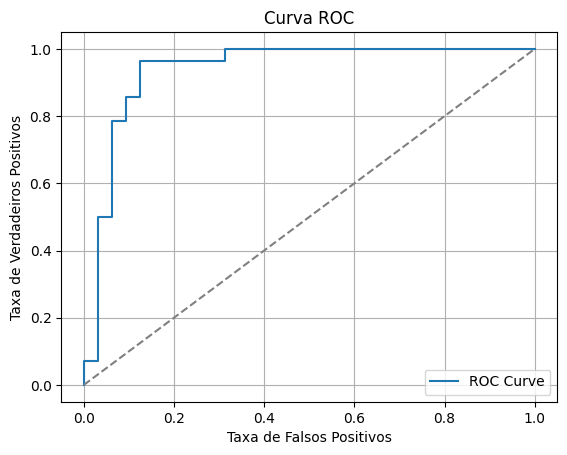

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()

| Eixo | Nome                          | Significado                                                         |
| ---- | ----------------------------- | ------------------------------------------------------------------- |
| X    | **FPR** = False Positive Rate | Proporção de negativos reais que foram classificados como positivos |
| Y    | **TPR** = True Positive Rate  | Proporção de positivos reais que foram corretamente identificados   |


## ✅ Conclusões
**Para Regressão:**
- Use **R²** para ver o quanto seu modelo explica.
- Use **RMSE** se erros grandes forem críticos.
- Use **MAE** para uma métrica mais simples e estável.

**Para Classificação:**
- Use **acurácia** quando as classes estiverem balanceadas.
- Use **precisão** quando os falsos positivos forem críticos (ex: spam).
- Use **recall** quando os falsos negativos forem críticos (ex: detecção de doença).
- Use **F1-score** para equilibrar precisão e recall.
- Use **AUC** para avaliar o desempenho geral do modelo.